<a href="https://colab.research.google.com/github/L-kiad/DO/blob/main/email_classification_spam_or_ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> IMPORTING LIBRARIES & DATASET </p>

In [2]:
!pip install optuna --q # For tuning hyperparameters

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 404.2/404.2 kB 4.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 225.3/225.3 kB 8.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 78.7/78.7 kB 6.4 MB/s eta 0:00:00


In [3]:
!pip install catboost lightgbm

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.6/98.6 MB 10.4 MB/s eta 0:00:00


In [4]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# libraries for text processing and handling text data
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

from collections import Counter

# all the required models
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# for model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# for hyperparameter tuning
import optuna

# to save the required files
import pickle

import warnings
warnings.filterwarnings('ignore') # To prevent kernel from showing any warning

In [5]:
# loading the dataset
df = pd.read_csv('/content/gdrive/MyDrive/mail_datasets/cleaned_data_body_label_nowords_nochars_nosent/cleaned_orgin_data.csv')
df.head()

Body  Label  no_char  \
0  \nSave up to 70% on Life Insurance.\nWhy Spend...      1     1111   
1  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1      753   
2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1      610   
3  ##############################################...      1     2863   
4  I thought you might like these:\n1) Slim Down ...      1      641   

   no_words  no_sent  
0       191       12  
1       139        5  
2       113        4  
3       690       35  
4       108        4

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> INITIAL ANALYSIS </p>

In [6]:
# What is the data type of cols?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9108 entries, 0 to 9107
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Body      9104 non-null   object
 1   Label     9108 non-null   int64 
 2   no_char   9108 non-null   int64 
 3   no_words  9108 non-null   int64 
 4   no_sent   9108 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 355.9+ KB


In [7]:
# Are there any missing values?
df.isnull().sum()

Body        4
Label       0
no_char     0
no_words    0
no_sent     0
dtype: int64

In [8]:
# Are there any duplicate values?
df.duplicated().sum()

1045

<div style="color:white;
           display:fill;
           background-color:#562F5E;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Observations üëÄ</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           1. Data contains 6046 rows and 3 columns <br>
           2. It has 1 string/object column, and one categorical column in int format <br>
           3. There's only 1 null value present <br>
           4. There are no duplicate values present within data <br>
    </div>

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> FEATURE ENGINEERING </p>

In [9]:
# dropping null values
df.dropna(inplace=True)

**For the purpose of data exploration, I am creating new features:**

* no_char: Number of characters in the email
* no_words: Number of words in the text email
* no_sent: Number of sentences in the text email

In [11]:
df.head()

Body  Label  no_char  \
0  \nSave up to 70% on Life Insurance.\nWhy Spend...      1     1111   
1  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1      753   
2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1      610   
3  ##############################################...      1     2863   
4  I thought you might like these:\n1) Slim Down ...      1      641   

   no_words  no_sent  
0       191       12  
1       139        5  
2       113        4  
3       690       35  
4       108        4

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> EDA - I </p>

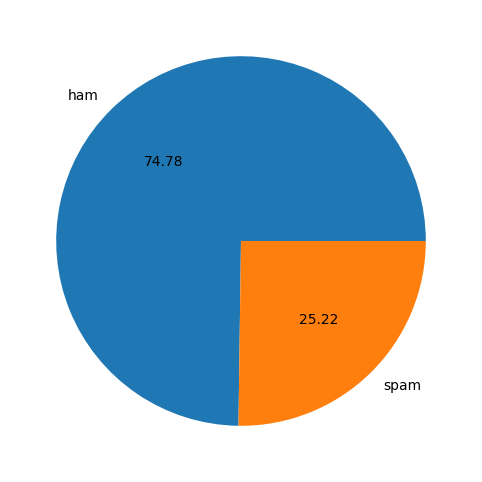

In [12]:
# Let's see the distribution of target variable
plt.figure(figsize=(12,6))
plt.pie(df['Label'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

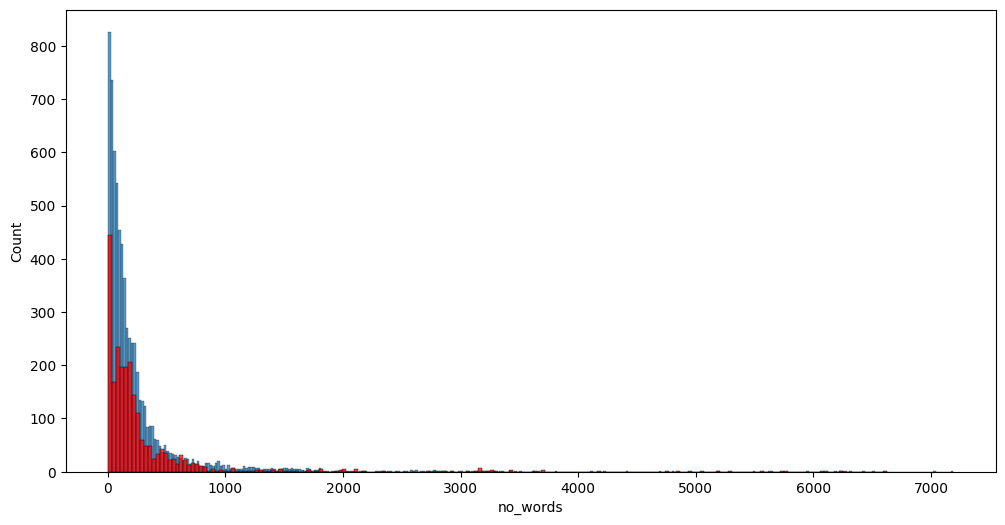

In [13]:
# Lets see the distribution of number of words in spam and ham emails
plt.figure(figsize=(12,6))
sns.histplot(df[df['Label'] == 0]['no_words'])
sns.histplot(df[df['Label'] == 1]['no_words'], color='red')
plt.show()

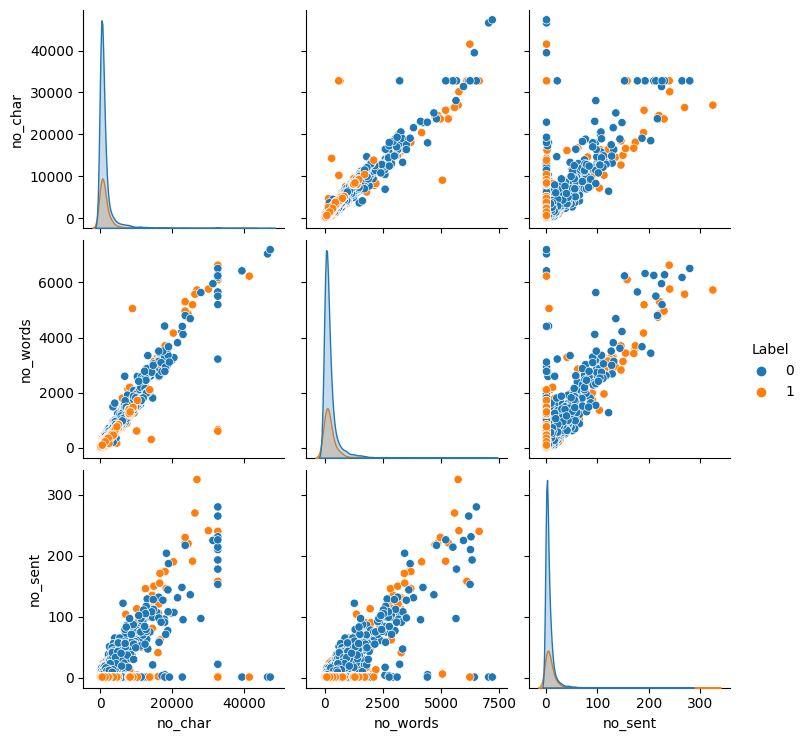

In [14]:
sns.pairplot(df, hue='Label')
plt.show()

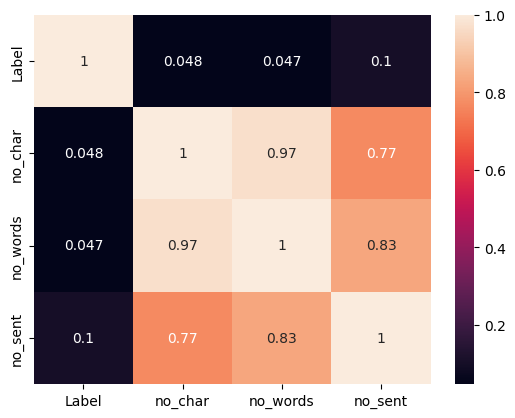

In [16]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> TEXT PREPROCESSING </p>

Chaque fois que nous avons des donn√©es textuelles, nous devons appliquer plusieurs √©tapes de pr√©traitement aux donn√©es pour transformer les mots en caract√©ristiques num√©riques qui fonctionnent avec les algorithmes d'apprentissage automatique. Les √©tapes de pr√©traitement pour un probl√®me d√©pendent principalement du domaine et du probl√®me lui-m√™me, donc nous n'avons pas besoin d'appliquer toutes les √©tapes √† chaque probl√®me.

<b>Pour ce probl√®me, j'ai cr√©√© une fonction qui effectue les √©tapes suivantes :</b>

*Minuscules du texte <br>
*D√©coupage en mots<br>
*Suppression des caract√®res sp√©ciaux<br>
*Suppression des mots vides<br>
*Suppression de la ponctuation<br>
*Racinisation<br>

In [19]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
def text_preprocessing(text):
    # convert  text to lowecase
    text = text.lower()

    # creating list of words in email
    text = nltk.word_tokenize(text)

    # removing special charecters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # copying processed text to text and clearing y to store next steps output
    text = y[:]
    y.clear()

    # removing stopwords and punctuation marks
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # stemming
    stemmer = SnowballStemmer('english')
    for i in text:
        y.append(stemmer.stem(i))

    return " ".join(y)

In [21]:
# applying function to text
df['clean_text'] = df['Body'].apply(text_preprocessing)

In [ ]:
df

Body  Label  no_char  \
0     \nSave up to 70% on Life Insurance.\nWhy Spend...      1     1111   
1     1) Fight The Risk of Cancer!\nhttp://www.adcli...      1      753   
2     1) Fight The Risk of Cancer!\nhttp://www.adcli...      1      610   
3     ##############################################...      1     2863   
4     I thought you might like these:\n1) Slim Down ...      1      641   
...                                                 ...    ...      ...   
6041                                              empty      0        5   
6042                    ___           ___           ...      0    16999   
6043  IN THIS ISSUE:01. Readers write\n02. Extension...      0     7299   
6044                                              empty      0        5   
6045                                              empty      0        5   

      no_words  no_sent                                         clean_text  
0          191       12  save 70 life insur spend life quot save ensur ...  
1          139        5  1 fight risk cancer http slim guarante lose lb...  
2          113        4  1 fight risk cancer http slim guarante lose lb...  
3          690       35  adult club offer free membership instant acces...  
4          108        4  thought might like 1 slim guarante lose lbs 30...  
...        ...      ...                                                ...  
6041         1        1                                              empti  
6042      3092       91  insignific matter heavili overemphasis hugh mt...  
6043      1478       83  reader write extens search dumb messag revisit...  
6044         1        1                                              empti  
6045         1        1                                              empti  

[6045 rows x 6 columns]

# EXPLORATORY DATA ANALYSIS - II

Le nuage de mots est une technique de visualisation de donn√©es utilis√©e pour repr√©senter des donn√©es textuelles o√π la taille de chaque mot indique sa fr√©quence ou son importance. Les points significatifs de donn√©es textuelles peuvent √™tre mis en √©vidence √† l'aide d'un nuage de mots.

In [22]:
# setting specs of word cloud image
wc = WordCloud(width=1000, height=500, min_font_size=10, background_color='black')

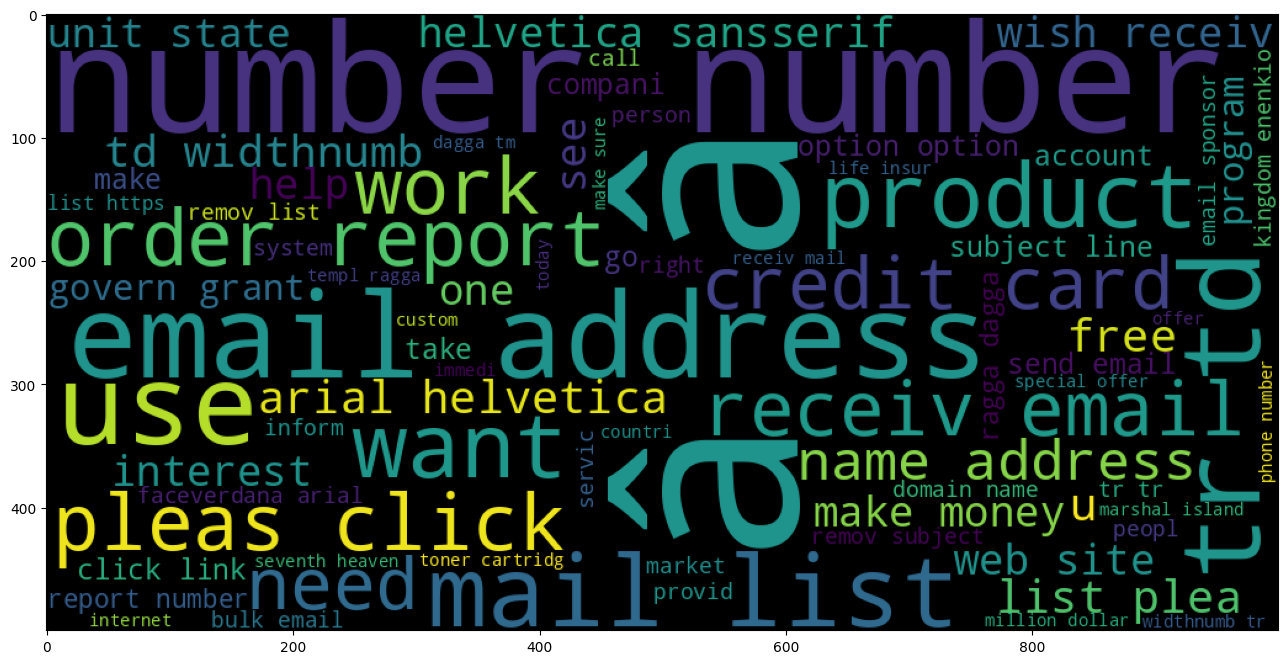

In [23]:
# creating word cloud of spam emails
spam_wc = wc.generate(df[df['Label'] == 1]['clean_text'].str.cat(sep=' '))

plt.figure(figsize=(20,8))
plt.imshow(spam_wc)

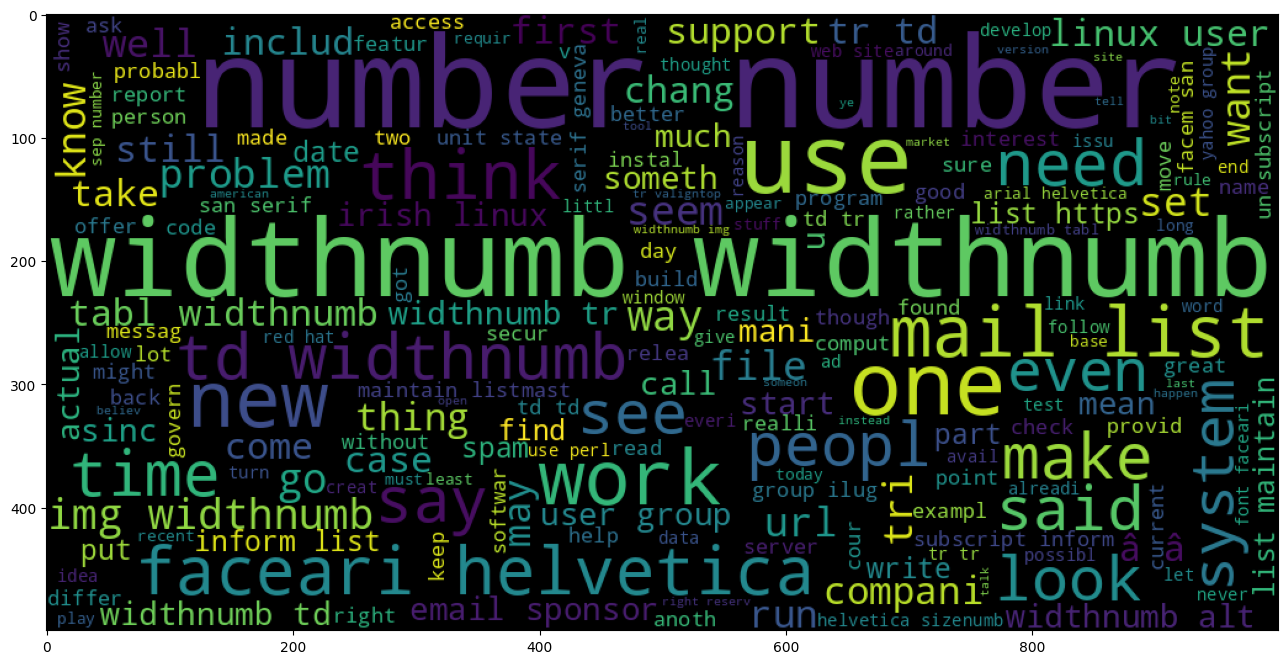

In [24]:
# creating word cloud of ham emails
ham_wc = wc.generate(df[df['Label'] == 0]['clean_text'].str.cat(sep=' '))

plt.figure(figsize=(20,8))
plt.imshow(ham_wc)

In [25]:
# creating list of all the words in processed spam emails
spam_corpus = []
for mail in df[df['Label'] == 1]['clean_text'].tolist():
    for word in mail.split():
        spam_corpus.append(word)

# number of words in all spam mails
len(spam_corpus)

345839

In [26]:
# creating list of all the words in processed ham emails
ham_corpus = []
for mail in df[df['Label'] == 0]['clean_text'].tolist():
    for word in mail.split():
        ham_corpus.append(word)

# number of words in all ham mails
len(ham_corpus)

936955

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> TRAIN TEST SPLIT </p>

TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).  

Tf-idf is one of the best metrics to determine how significant a term is to a text in a series or a corpus. tf-idf is a weighting system that assigns a weight to each word in a document based on its term frequency (tf) and the reciprocal document frequency (tf) (idf). The words with higher scores of weight are deemed to be more significant.

In [27]:
#Changing text data in to numbers.

# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=17000)

# Setting up features and target as x and y
x = tfidf.fit_transform(df['clean_text']).toarray()
y = df['Label'].values

In [28]:
# Splitting the testing and training sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> MODEL SELECTION </p>

In [29]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=0)
abc = AdaBoostClassifier(n_estimators=50, random_state=0)
bc = BaggingClassifier(n_estimators=50, random_state=0)
etc = ExtraTreesClassifier(n_estimators=50, random_state=0)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=0)
xgb = XGBClassifier(n_estimators=50,random_state=0)
sgd = SGDClassifier(random_state=0)
cat = CatBoostClassifier(verbose=0, random_state=0)
lgbm = LGBMClassifier(random_state=0)

In [34]:
classifiers = {
    'GaussianNB' : gnb,
    'MultinomialNB' : mnb,
    'BernoulliNB' : bnb,
    'SVC' : svc,
    'KNeighbors' : knc,
    'DecisionTree': dtc,
    'LogisticRegression': lrc,
    'RandomForest': rfc,
    'AdaBoost': abc,
    'BaggingClassifier': bc,
    'ExtraTreesClassifier': etc,
    'GradientBoosting': gbdt,
    'XGB': xgb,
    'SGD' : sgd,
    'Catboost' : cat,
    'LGBM' : lgbm
}

In [35]:
# creating a function to train list of algorithms and give accuracy , precision score
def train_classifier(classifiers,x_train,y_train,x_test,y_test):

    classifiers.fit(x_train,y_train)

    y_pred = classifiers.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [37]:
# storing accuracy and precision in list
accuracy_scores = []
precision_scores = []

# training all the models on training data
for name, classifier in classifiers.items():

    current_accuracy,current_precision = train_classifier(classifier, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision,'\n')

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  GaussianNB
Accuracy -  0.9275123558484349
Precision -  0.8292682926829268 

For  MultinomialNB
Accuracy -  0.9406919275123559
Precision -  0.8990825688073395 

For  BernoulliNB
Accuracy -  0.9489291598023064
Precision -  0.9714285714285714 

For  SVC
Accuracy -  0.9632070291048874
Precision -  0.9026915113871635 

For  KNeighbors
Accuracy -  0.4623833058758924
Precision -  0.31387900355871884 

For  DecisionTree
Accuracy -  0.886326194398682
Precision -  0.7654584221748401 

For  LogisticRegression
Accuracy -  0.943437671609006
Precision -  0.8795698924731182 

For  RandomForest
Accuracy -  0.9648544755628775
Precision -  0.9083333333333333 

For  AdaBoost
Accuracy -  0.942339373970346
Precision -  0.8618556701030928 

For  BaggingClassifier
Accuracy -  0.9533223503569467
Precision -  0.8824742268041237 

For  ExtraTreesClassifier
Accuracy -  0.9654036243822076
Precision -  0.9119496855345912 

For  GradientBoosting
Accuracy -  0.9225700164744646
Precision -  0.8795180722891566 



Data Frame of accuracy and precision of models trained on all features

In [39]:
performance = pd.DataFrame({'Algorithm': classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance.sort_values('Accuracy', ascending=False)

Algorithm  Accuracy  Precision
10  ExtraTreesClassifier  0.965404   0.911950
7           RandomForest  0.964854   0.908333
13                   SGD  0.964854   0.904959
3                    SVC  0.963207   0.902692
15                  LGBM  0.962109   0.898969
14              Catboost  0.957166   0.900424
12                   XGB  0.954970   0.894515
9      BaggingClassifier  0.953322   0.882474
2            BernoulliNB  0.948929   0.971429
6     LogisticRegression  0.943438   0.879570
8               AdaBoost  0.942339   0.861856
1          MultinomialNB  0.940692   0.899083
0             GaussianNB  0.927512   0.829268
11      GradientBoosting  0.922570   0.879518
5           DecisionTree  0.886326   0.765458
4             KNeighbors  0.462383   0.313879

In [41]:
performance.sort_values('Accuracy', ascending=False).head(5)

Algorithm  Accuracy  Precision
10  ExtraTreesClassifier  0.965404   0.911950
7           RandomForest  0.964854   0.908333
13                   SGD  0.964854   0.904959
3                    SVC  0.963207   0.902692
15                  LGBM  0.962109   0.898969

Accuracy :
L'accuracy est une mesure de la performance d'un mod√®le qui indique la proportion de pr√©dictions correctes parmi toutes les pr√©dictions effectu√©es. En d'autres termes, c'est le ratio des pr√©dictions correctes (vrais positifs et vrais n√©gatifs) sur l'ensemble des pr√©dictions. L'accuracy est calcul√©e comme suit :
<pre>
Accuracy = NPC/NPT
NPT: Nombre total de predictions
NPC: Nombre de predictions correctes
</pre>

L'accuracy est une m√©trique utile lorsque les classes sont √©quilibr√©es dans le jeu de donn√©es, c'est-√†-dire lorsque le nombre d'exemples positifs et n√©gatifs est √† peu pr√®s le m√™me. Cependant, l'accuracy peut √™tre trompeuse si les classes sont d√©s√©quilibr√©es. Par exemple, si vous avez un jeu de donn√©es avec 95% de classe A et 5% de classe B, un mod√®le pr√©disant toujours la classe A obtiendrait une accuracy de 95%, mais il ne serait pas tr√®s utile en pratique.

Precision :
La pr√©cision est une m√©trique qui √©value la proportion de pr√©dictions positives correctes parmi toutes les pr√©dictions positives faites par le mod√®le. En d'autres termes, c'est le ratio des vrais positifs (pr√©dictions positives correctes) sur l'ensemble des pr√©dictions positives (vrais positifs + faux positifs). La pr√©cision est calcul√©e comme suit :
<pre>
Precision =  VP / (VP + FP)
VP: Vrais Positifs
FP: Faux Positifs
</pre>

La pr√©cision est particuli√®rement importante lorsque les faux positifs sont co√ªteux ou ind√©sirables. Par exemple, dans un syst√®me de d√©tection de fraude, vous voudriez avoir une haute pr√©cision pour √©viter de signaler des transactions l√©gitimes comme frauduleuses.

Data Frame of accuracy and precision of models trained on max_features = 17000

In [43]:
performance_maxf17k = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy_maxf17k':accuracy_scores,'Precision_maxf17k':precision_scores}).sort_values('Precision_maxf17k',ascending=False)
performance_maxf17k.sort_values('Accuracy_maxf17k', ascending=False).head(5)

Algorithm  Accuracy_maxf17k  Precision_maxf17k
10  ExtraTreesClassifier          0.965404           0.911950
7           RandomForest          0.964854           0.908333
13                   SGD          0.964854           0.904959
3                    SVC          0.963207           0.902692
15                  LGBM          0.962109           0.898969

We can clearly see algorithm trained on 17000 features giving us the best result

**Best Performing Models:**
* RandomForest
* SGD
* SVC
* LGBM

# HYPERPARAMETER TUNING

*Les param√®tres qui d√©finissent l'architecture du mod√®le sont appel√©s hyperparam√®tres, et ainsi ce processus de recherche de l'architecture de mod√®le id√©ale est appel√© ajustement d'hyperparam√®tres.
*Les hyperparam√®tres ne sont pas des param√®tres du mod√®le et ils ne peuvent pas √™tre directement entra√Æn√©s √† partir des donn√©es. Les param√®tres du mod√®le sont appris lors de l'entra√Ænement lorsque nous optimisons une fonction de perte en utilisant quelque chose comme la descente de gradient.

*Les param√®tres du mod√®le sp√©cifient comment transformer les donn√©es d'entr√©e en la sortie souhait√©e, les hyperparam√®tres d√©finissent comment notre mod√®le est r√©ellement structur√©. Malheureusement, il n'y a pas de moyen de calculer "quelle direction devrais-je mettre √† jour mon hyperparam√®tre pour r√©duire la perte ?" (c'est-√†-dire les gradients) afin de trouver l'architecture de mod√®le optimale ; ainsi, nous avons g√©n√©ralement recours √† l'exp√©rimentation pour d√©couvrir ce qui fonctionne le mieux.

**Ajustement des hyperparam√®tres avec Optuna :
Optuna est "une biblioth√®que open-source d'optimisation d'hyperparam√®tres pour automatiser la recherche d'hyperparam√®tres optimaux". Les principales caract√©ristiques d'Optuna comprennent "la recherche automatis√©e d'hyperparam√®tres optimaux", "l'exploration efficace de grands espaces et l'√©lagage des essais peu prometteurs pour des r√©sultats plus rapides" et "la parall√©lisation des recherches d'hyperparam√®tres sur plusieurs threads ou processus".

## Tunning Random Forest

In [44]:
def objective_rfc(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300, step=50)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    rfc = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=0
    )

    return cross_val_score(rfc, x_train, y_train, n_jobs=-1, verbose=0, scoring='precision').mean()

In [45]:

study_rfc = optuna.create_study(direction='maximize')
study_rfc.optimize(objective_rfc, n_trials=10)

best_params_rfc = study_rfc.best_trial.params

print('Best hyperparameters for RandomForest: {}'.format(best_params_rfc))

[I 2023-08-16 10:07:01,317] A new study created in memory with name: no-name-90d13c10-29e3-48c1-9b56-6511d371050c
[I 2023-08-16 10:07:14,418] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 300, 'max_depth': 9, 'min_samples_split': 0.38326295544673084, 'min_samples_leaf': 0.32894456819239126, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.0.
[I 2023-08-16 10:07:18,713] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 50, 'max_depth': 12, 'min_samples_split': 0.6655724723779268, 'min_samples_leaf': 0.4756966821704933, 'max_features': 'log2'}. Best is trial 0 with value: 0.0.
[I 2023-08-16 10:07:24,120] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 150, 'max_depth': 12, 'min_samples_split': 0.6744716829250924, 'min_samples_leaf': 0.35429244601709653, 'max_features': 'auto'}. Best is trial 0 with value: 0.0.
[I 2023-08-16 10:07:36,247] Trial 3 finished with value: 0.0 and parameters: {'n_estimators': 150, 'max_depth': 6, 'min_

Best hyperparameters for RandomForest: {'n_estimators': 300, 'max_depth': 9, 'min_samples_split': 0.38326295544673084, 'min_samples_leaf': 0.32894456819239126, 'max_features': 'sqrt'}


In [46]:
# Cr√©ez un mod√®le RandomForest avec les meilleurs hyperparam√®tres trouv√©s
rfc = RandomForestClassifier(
    n_estimators=best_params_rfc['n_estimators'],
    max_depth=best_params_rfc['max_depth'],
    min_samples_split=best_params_rfc['min_samples_split'],
    min_samples_leaf=best_params_rfc['min_samples_leaf'],
    max_features=best_params_rfc['max_features'],
    random_state=0
)

# Entra√Ænez le mod√®le avec les meilleurs hyperparam√®tres sur vos donn√©es d'entra√Ænement
rfc.fit(x_train, y_train)

# Faites des pr√©dictions sur les donn√©es de test et √©valuez les performances
rfc_pred = rfc.predict(x_test)
print('Accuracy for RandomForest:', accuracy_score(y_test, rfc_pred))
print('Precision for RandomForest:', precision_score(y_test, rfc_pred))


Accuracy for RandomForest: 0.7495881383855024
Precision for RandomForest: 0.0


**Tuning BernoulliNB**

The first step is to define the objective function for Optuna to maximize or minimize. The objective function should take a ‚ÄúTrial‚Äù object as the input and return the score, a float value or a list of float values.

In [47]:
def objective_bnb(trial):
        alpha = trial.suggest_categorical('alpha', [0.7,0.8,0.9,1,1.1,1.2,1.3])
        binarize = trial.suggest_categorical('binarize', [0.0,0.1,0.2,0.3])

        bnb = BernoulliNB(
            alpha=alpha,
            binarize=binarize
        )
        return cross_val_score(bnb, x_train, y_train, n_jobs=-1, verbose=0, scoring='precision').mean()

The next step is to use the objective function to create a ‚ÄúStudy‚Äù object and then optimize it.

In [48]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_bnb, n_trials=10)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2023-08-16 10:13:11,159] A new study created in memory with name: no-name-e00c4ea6-8b5d-4be3-8c76-52ace7131fc3
[I 2023-08-16 10:13:25,377] Trial 0 finished with value: 0.9500320520962738 and parameters: {'alpha': 0.8, 'binarize': 0.1}. Best is trial 0 with value: 0.9500320520962738.
[I 2023-08-16 10:13:34,010] Trial 1 finished with value: 0.9628585398623282 and parameters: {'alpha': 1.3, 'binarize': 0.1}. Best is trial 1 with value: 0.9628585398623282.
[I 2023-08-16 10:13:43,462] Trial 2 finished with value: 0.9882352941176471 and parameters: {'alpha': 0.9, 'binarize': 0.3}. Best is trial 2 with value: 0.9882352941176471.
[I 2023-08-16 10:13:52,224] Trial 3 finished with value: 0.9628585398623282 and parameters: {'alpha': 1.3, 'binarize': 0.1}. Best is trial 2 with value: 0.9882352941176471.
[I 2023-08-16 10:14:00,733] Trial 4 finished with value: 0.9775933494760881 and parameters: {'alpha': 1.3, 'binarize': 0.0}. Best is trial 2 with value: 0.9882352941176471.
[I 2023-08-16 10:14:1

Accuracy: 0.9882352941176471
Best hyperparameters: {'alpha': 0.9, 'binarize': 0.3}


In [49]:
bnb = BernoulliNB(alpha=0.9, binarize=0.3)
bnb.fit(x_train,y_train)

bnb_pred = bnb.predict(x_test)
print('Accuracy:',accuracy_score(y_test,bnb_pred))
print('Precision:',precision_score(y_test,bnb_pred))

Accuracy: 0.7913234486545854
Precision: 0.9634146341463414


Nous avons r√©ussi √† augmenter la pr√©cision mais l'exactitude a diminu√©. J'ai beaucoup exp√©riment√© et j'ai constat√© qu'un des scores diminue si j'essaie d'augmenter les autres. Donc, je ne vais pas r√©gler ce mod√®le car il me donne de meilleurs r√©sultats de cette mani√®re.

**Tuning SGDClassifier:**

In [50]:
def objective_sgd(trial):
        loss = trial.suggest_categorical('loss', ['hinge','log_loss','log','modified_huber','squared_hinge','perceptron'])
        penalty = trial.suggest_categorical('penalty', ['l2','l1','elasticnet'])
        l1_ratio = trial.suggest_categorical('l1_ratio', [0.2,0.5,0.8])
        max_iter = trial.suggest_categorical('max_iter', [100,500,1000])


        sgd = SGDClassifier(
                            early_stopping=True,
                            random_state=0,
                            loss=loss,
                            penalty=penalty,
                            l1_ratio=l1_ratio,
                            max_iter=max_iter
        )
        return cross_val_score(sgd, x_train, y_train, n_jobs=-1, verbose=0, scoring='precision').mean()

In [51]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_sgd, n_trials=20)

trial_sgd = study.best_trial

print('Accuracy: {}'.format(trial_sgd.value))
print("Best hyperparameters: {}".format(trial_sgd.params))

[I 2023-08-16 10:15:29,878] A new study created in memory with name: no-name-ea6512e5-35c0-4ec9-88a9-347e620ae082
[I 2023-08-16 10:15:51,609] Trial 0 finished with value: 0.860351939299649 and parameters: {'loss': 'perceptron', 'penalty': 'elasticnet', 'l1_ratio': 0.8, 'max_iter': 1000}. Best is trial 0 with value: 0.860351939299649.
[I 2023-08-16 10:16:18,887] Trial 1 finished with value: 0.8967547709015052 and parameters: {'loss': 'modified_huber', 'penalty': 'l1', 'l1_ratio': 0.8, 'max_iter': 100}. Best is trial 1 with value: 0.8967547709015052.
[I 2023-08-16 10:16:44,876] Trial 2 finished with value: 0.8956484161293276 and parameters: {'loss': 'log', 'penalty': 'l1', 'l1_ratio': 0.2, 'max_iter': 500}. Best is trial 1 with value: 0.8967547709015052.
[I 2023-08-16 10:17:13,404] Trial 3 finished with value: 0.8967547709015052 and parameters: {'loss': 'modified_huber', 'penalty': 'l1', 'l1_ratio': 0.5, 'max_iter': 100}. Best is trial 1 with value: 0.8967547709015052.
[I 2023-08-16 10:1

Accuracy: 0.9648266265580606
Best hyperparameters: {'loss': 'perceptron', 'penalty': 'l2', 'l1_ratio': 0.5, 'max_iter': 1000}


In [52]:
sgd = SGDClassifier(loss='perceptron',penalty='l2',l1_ratio=0.5,max_iter=1000)
sgd.fit(x_train,y_train)

sgd_pred = sgd.predict(x_test)
print('Accuracy:',accuracy_score(y_test,sgd_pred))
print('Precision:',precision_score(y_test,sgd_pred))


Accuracy: 0.9665019220208677
Precision: 0.8895463510848126


Nous avons augment√© la pr√©cision et l'exactitude semble √©galement bonne.

Je donne plus d'importance √† la pr√©cision, car la pr√©cision signifie le nombre d'e-mails l√©gitimes class√©s comme spam, tandis que l'exactitude signifie le nombre d'e-mails correctement class√©s.

Je suis d'accord avec quelques e-mails ind√©sirables qui ne sont pas class√©s comme spam, mais je ne veux pas qu'un seul e-mail l√©gitime soit class√© comme spam, car il pourrait √™tre tr√®s important. C'est pourquoi je veux que la pr√©cision soit tr√®s √©lev√©e ainsi que l'exactitude.